In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    
%matplotlib inline

In [52]:
data_train = pd.DataFrame(pd.read_csv("./feature_1.csv",header = 0))
data_train_beiyong = data_train

In [53]:
#data_train.info()
data_train = data_train_beiyong

In [54]:
data_train.head(10)

,Unnamed: 0,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,coupon_use,total_count,coupon_count,buy_count,use_count,coupon_not_use,coupon_not_use_count,not_buy,not_buy_count,Discount_rate_num,use_rate
0,0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0,0,7,5,3,1,1,2,0,4,0.000000,0.2
1,1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN,0,7,5,3,1,0,2,1,4,0.133333,0.2
2,2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN,0,7,5,3,1,0,2,1,4,0.050000,0.2
3,3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN,0,7,5,3,1,0,2,1,4,0.050000,0.2
4,4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN,0,7,5,3,1,0,2,1,4,0.050000,0.2
5,5,1439408,2632,NaN,NaN,0.0,NaN,20160516.0,0,7,5,3,1,1,2,0,4,0.000000,0.2
6,6,1439408,2632,8591.0,20:1,0.0,20160516.0,20160613.0,1,7,5,3,1,0,2,0,4,0.050000,0.2
7,7,1832624,3381,7610.0,200:20,0.0,20160429.0,NaN,0,1,1,0,0,0,0,1,1,0.100000,0.0
8,8,2029232,3381,11951.0,200:20,1.0,20160129.0,NaN,0,5,3,2,0,0,2,1,3,0.100000,0.0
9,9,2029232,450,1532.0,30:5,0.0,20160530.0,NaN,0,5,3,2,0,0,2,1,3,0.166667,0.0


In [55]:
#得到用户的券的满减区间 0-50 为 ‘2’ 50-200 为‘3’ 200-500 为‘4’ 直接折扣为 ‘1’

data_train['Discount_range'] =data_train['Discount_rate'].isnull().apply(lambda x: 0 if x else 1)
x = []
for i,j in zip(data_train['Discount_range'], data_train['Discount_rate']):
    #print(i,j)
    if i == 0:
        x.append('0')
    else:
        a = j.split(':')
        a = list(map(float, a))
        if len(a) < 2:
            x.append('1')
        else:
            if a[0] <= 50:
                x.append('2')
            elif a[0] <= 200:
                x.append('3')
            else:
                x.append('4')
    
    
data_train['Discount_range'] = x
#data_test


In [56]:
data_train.head()

,Unnamed: 0,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,coupon_use,total_count,coupon_count,buy_count,use_count,coupon_not_use,coupon_not_use_count,not_buy,not_buy_count,Discount_rate_num,use_rate,Discount_range
0,0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0,0,7,5,3,1,1,2,0,4,0.000000,0.2,0
1,1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN,0,7,5,3,1,0,2,1,4,0.133333,0.2,3
2,2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN,0,7,5,3,1,0,2,1,4,0.050000,0.2,2
3,3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN,0,7,5,3,1,0,2,1,4,0.050000,0.2,2
4,4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN,0,7,5,3,1,0,2,1,4,0.050000,0.2,2


In [57]:
#统计每种券用户的核销次数

def my_test(a, b):
    
    return a=='2' and b == 1

data_train['count_2'] = data_train.apply(lambda row: my_test(row['Discount_range'], row['coupon_use']), axis=1)
data_train['count_2'] = data_train[['count_2']].astype(int)

gb = data_train.groupby('User_id')
count_m=gb['count_2'].sum().reset_index(drop=False)
count_m.rename(columns={'count_2':'2_use_count'}, inplace = True)
data_train=data_train.merge(count_m,how='left',on='User_id')


def my_test(a, b):
    
    return a=='3' and b == 1

data_train['count_3'] = data_train.apply(lambda row: my_test(row['Discount_range'], row['coupon_use']), axis=1)
data_train['count_3'] = data_train[['count_3']].astype(int)

gb = data_train.groupby('User_id')
count_m=gb['count_3'].sum().reset_index(drop=False)
count_m.rename(columns={'count_3':'3_use_count'}, inplace = True)
data_train=data_train.merge(count_m,how='left',on='User_id')

def my_test(a, b):
    
    return a=='4' and b == 1

data_train['count_4'] = data_train.apply(lambda row: my_test(row['Discount_range'], row['coupon_use']), axis=1)
data_train['count_4'] = data_train[['count_4']].astype(int)

gb = data_train.groupby('User_id')
count_m=gb['count_4'].sum().reset_index(drop=False)
count_m.rename(columns={'count_4':'4_use_count'}, inplace = True)
data_train=data_train.merge(count_m,how='left',on='User_id')


In [59]:
#data_train.head(20)

In [60]:
#统计每种券用户的领取次数
#2
data_train['count_2'] = data_train['Discount_range'] == '2'
data_train['count_2'] = data_train[['count_2']].astype(int)

gb = data_train.groupby('User_id')
count_m=gb['count_2'].sum().reset_index(drop=False)
count_m.rename(columns={'count_2':'2_count'}, inplace = True)
data_train=data_train.merge(count_m,how='left',on='User_id')

#3
data_train['count_3'] = data_train['Discount_range'] == '3'
data_train['count_3'] = data_train[['count_3']].astype(int)

gb = data_train.groupby('User_id')
count_m=gb['count_3'].sum().reset_index(drop=False)
count_m.rename(columns={'count_3':'3_count'}, inplace = True)
data_train=data_train.merge(count_m,how='left',on='User_id')

#4
data_train['count_4'] = data_train['Discount_range'] == '4'
data_train['count_4'] = data_train[['count_4']].astype(int)

gb = data_train.groupby('User_id')
count_m=gb['count_4'].sum().reset_index(drop=False)
count_m.rename(columns={'count_4':'4_count'}, inplace = True)
data_train=data_train.merge(count_m,how='left',on='User_id')


In [62]:
#data_train = data_train.drop(columns=['count_m', 'count_1'])
#data_train.head(20)

In [65]:
data_train['2_use'] = data_train['2_use_count']/data_train['2_count']
data_train['2_use'] = data_train['2_use'].replace(np.nan, 0)
data_train['3_use'] = data_train['3_use_count']/data_train['3_count']
data_train['3_use'] = data_train['3_use'].replace(np.nan, 0)
data_train['4_use'] = data_train['4_use_count']/data_train['4_count']
data_train['4_use'] = data_train['4_use'].replace(np.nan, 0)

,Unnamed: 0,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,coupon_use,total_count,...,count_3,3_use_count,count_4,4_use_count,2_count,3_count,4_count,2_use,3_use,4_use
0,0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0,0,7,...,0,0,0,0,4,1,0,0.25,0.0,0.0
1,1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN,0,7,...,1,0,0,0,4,1,0,0.25,0.0,0.0
2,2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN,0,7,...,0,0,0,0,4,1,0,0.25,0.0,0.0
3,3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN,0,7,...,0,0,0,0,4,1,0,0.25,0.0,0.0
4,4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN,0,7,...,0,0,0,0,4,1,0,0.25,0.0,0.0
5,5,1439408,2632,NaN,NaN,0.0,NaN,20160516.0,0,7,...,0,0,0,0,4,1,0,0.25,0.0,0.0
6,6,1439408,2632,8591.0,20:1,0.0,20160516.0,20160613.0,1,7,...,0,0,0,0,4,1,0,0.25,0.0,0.0
7,7,1832624,3381,7610.0,200:20,0.0,20160429.0,NaN,0,1,...,1,0,0,0,0,1,0,0.00,0.0,0.0
8,8,2029232,3381,11951.0,200:20,1.0,20160129.0,NaN,0,5,...,1,0,0,0,2,1,0,0.00,0.0,0.0
9,9,2029232,450,1532.0,30:5,0.0,20160530.0,NaN,0,5,...,0,0,0,0,2,1,0,0.00,0.0,0.0


In [67]:
#核销的优惠券占所有核销优惠券的比重

data_train['2_use_rate'] = data_train['2_use_count']/data_train['use_count']
data_train['2_use_rate'] = data_train['2_use_rate'].replace(np.nan, 0)
data_train['3_use_rate'] = data_train['3_use_count']/data_train['use_count']
data_train['3_use_rate'] = data_train['3_use_rate'].replace(np.nan, 0)
data_train['4_use_rate'] = data_train['4_use_count']/data_train['use_count']
data_train['4_use_rate'] = data_train['4_use_rate'].replace(np.nan, 0)


In [75]:
#data_train.head(20)
data_train = data_train.drop(columns = ['Unnamed: 0'])
data_train.to_csv('./feature_2.csv', index = False)

In [76]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754884 entries, 0 to 1754883
Data columns (total 34 columns):
User_id                 int64
Merchant_id             int64
Coupon_id               float64
Discount_rate           object
Distance                float64
Date_received           float64
Date                    float64
coupon_use              int64
total_count             int64
coupon_count            int64
buy_count               int64
use_count               int64
coupon_not_use          int64
coupon_not_use_count    int64
not_buy                 int64
not_buy_count           int64
Discount_rate_num       float64
use_rate                float64
Discount_range          object
count_2                 int64
2_use_count             int64
count_3                 int64
3_use_count             int64
count_4                 int64
4_use_count             int64
2_count                 int64
3_count                 int64
4_count                 int64
2_use                   float64
3

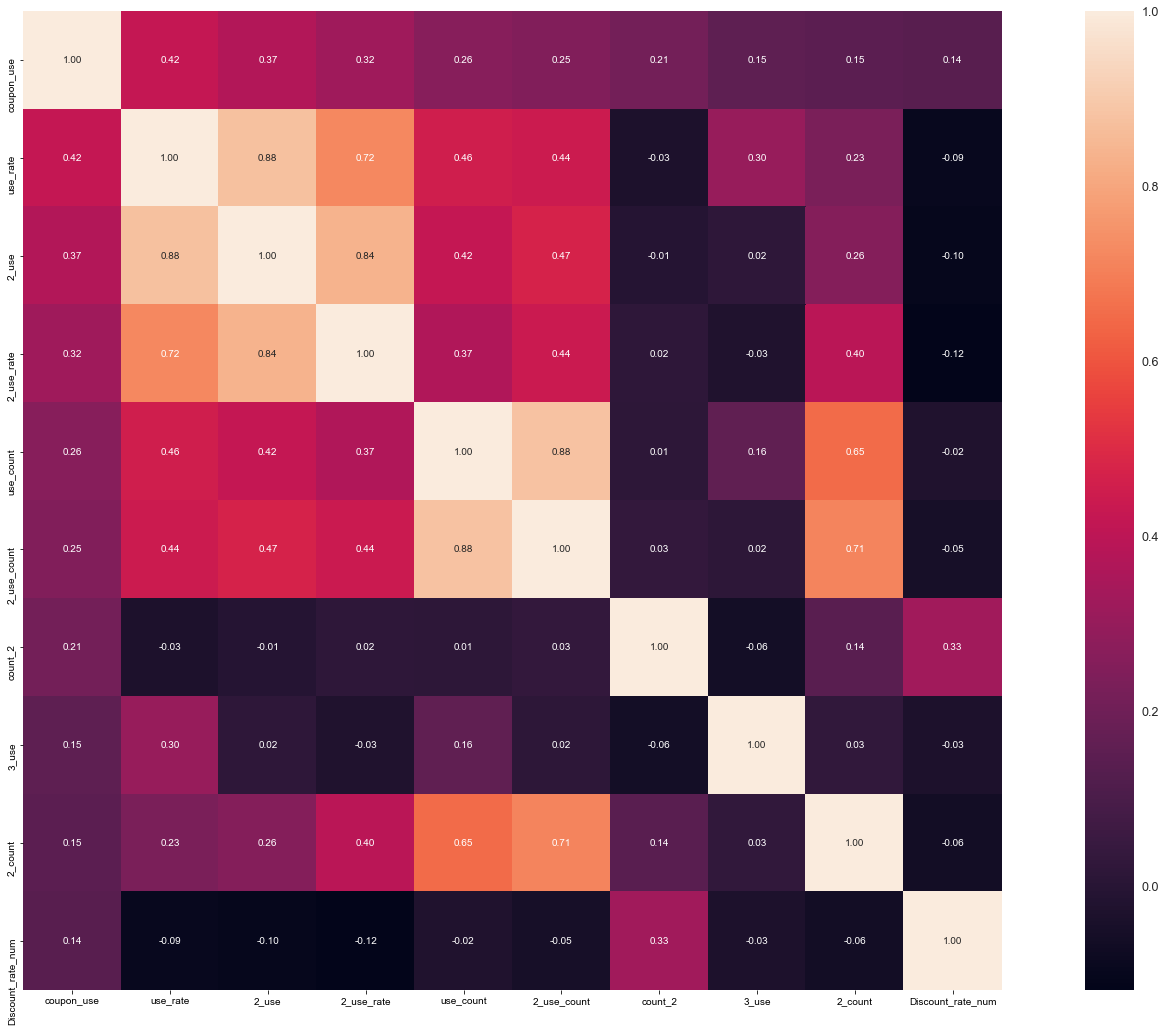

In [69]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(30, 18))
#sns.heatmap(corrmat, vmax=0.8, square=True,annot = True)

k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'coupon_use')['coupon_use'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
